# 04wk-2: Pandas – transform column (꿀팁), FIFA23 자료의 시각화

최규빈  
2023-09-27

<a href="https://colab.research.google.com/github/guebin/DV2023/blob/main/posts/04wk-2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

In [2]:
import numpy as np
import pandas as pd
from plotnine import *

# 2. Pandas: transform column (꿀팁)

## A. `lambda`

저번시간에 했음

## B. `map`

저번시간에 했음

## C. `s.apply(변환함수)`

`-` 예시1: 원소별로 처음3개의 숫자만 출력

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv')
s = df.Height

`-` 예시2: 원소별로 처음3개의 문자만 출력 $\to$ `str`자료형을
`int`자료형으로 변환

In [253]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv')
s = df.Height

(방법1) – 한번에

(방법2) – 연쇄적으로..

## D. `s.str`, `idx.str`

`-` 예시1: 원소별로 처음 3개의 숫자만 출력

In [259]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv')
s = df.Height

`-` 예시2: 원소별로 isupper를 수행

In [266]:
s = pd.Series(['A','B','C','d','e','F'])
s

`-` 예시3: 원소별로 공백제거 (pd.Series 뿐만 아니라 pd.Index 자료형에도
사용가능)

In [270]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv')
idx = df.columns

## E. `s.astype()`

`-` 예시1: 원소의 타입을 모두 `int`형으로 변경

In [273]:
s = pd.Series(list('12345'))
s

`-` 예시2: 원소의 타입을 변환한 이후 브로드캐스팅 (int)

In [274]:
s1 = pd.Series(list('12345'))
s2 = pd.Series([-1,-2,-3,-4,-5])

`# 예시3`: 원소의 타입을 변환한 이후 브로드캐스팅 (str)

In [279]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2023/main/posts/titanic.csv")[:5]
df

위의 자료에서 `Embarked` 열과 `Pclass`열을 이용하여 아래와 같은
`New Feature`를 만들어라.

| Embarked | Pclass | New Feature |
|:--------:|:------:|:-----------:|
|   ‘S’    |   3    |    ‘S3’     |
|   ‘C’    |   1    |    ‘C1’     |
|   ‘S’    |   3    |    ‘S3’     |
|   ‘S’    |   1    |    ‘S1’     |
|   ‘S’    |   3    |    ‘S3’     |

(풀이)

## F. 컴프리헨션, `lambda+map`을 무시하지 말 것

`# 예시1`

In [220]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2023/main/posts/titanic.csv")[:5]
df

위의 자료에서 아래와 같은 변환을 하고 싶다면?

$$
f(\text{sex}, \text{sibsp}) = 
\begin{cases} 
0.7 + 0.25 \times \text{sibsp} & \text{if } \text{sex} = \text{'female'} \\
0.1 + 0.15 \times \text{sibsp} & \text{otherwise}
\end{cases}
$$

`#`

`# 예시2`

In [252]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2023/main/posts/titanic.csv")[:5]
df

위의 자료에서 Name열을 아래와 같이 분리하는 작업을 수행하라.

|     | title | Name                                          |
|-----|-------|-----------------------------------------------|
| 0   | Mr    | Owen Harris Braund                            |
| 1   | Mrs   | John Bradley (Florence Briggs Thayer) Cumings |
| 2   | Miss  | Laina Heikkinen                               |
| 3   | Mrs   | Jacques Heath (Lily May Peel) Futrelle        |
| 4   | Mr    | William Henry Allen                           |

(풀이)

`#`

------------------------------------------------------------------------

# 3. FIFA23 시각화

`# DV2022-중간고사-4-(2)의 변형`:

아래는 FIFA22의 자료를 불러오는 코드이다.

In [283]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv')
df.head()

포지션별로 선수들의 능력치(`ShotPower`,`SlidingTackle`)와 급여(`Wage`)를
시각화하고 싶다. 아래의 세부지침에 맞추어 포지션별 `ShotPower`와
`SlidingTackle`의 산점도를 그려라. – (30점)

***세부지침***

**A**. Column의 이름에서 공백을 제거하라.

**B**. 결측치가 50%이상인 컬럼을 찾고 이를 제거하라. 그 뒤에
`.dropna()`를 사용하여 결측치가 포함된 행을 제거하라.

**C**. `position_dict`를 이용하여 `df.Position`을 적절하게 변환하라.
변환된 값을 `df.Position`에 저장하라.

In [284]:
position_dict = {
    'GOALKEEPER':{'GK'},
    'DEFENDER':{'CB','RCB','LCB','RB','LB','RWB','LWB'},
    'MIDFIELDER':{'CM','RCM','LCM','CDM','RDM','LDM','CAM','RAM','LAM','RM','LM'},
    'FORWARD':{'ST','CF','RF','LF','RW','LW','RS','LS'},
    'SUB':{'SUB'},
    'RES':{'RES'}
}
position_dict

**D**. `df.Wage`를 적절하게 변환하라.

**E**. `Position==“DEFENDER”` or `Position==“FORWARD”`에 해당하는
관측치를 고른 뒤 x축에 `ShotPower`, y축에 `SlidingTackle`을 시각화하라.
이때 `Position`은 color로 구분하고 `Wage`는 size와 alpha로 구분하라.

## A. 열의 이름에서 공백제거

## B. 결측치제거

## C. Position 칼럼의 변환

In [298]:
df.set_axis(df.columns.str.replace(' ',''),axis=1)\
.loc[:,lambda _df: _df.isna().mean() <0.5].dropna()\
.assign(Position = lambda _df: _df.Position.str.split('>').str[-1].apply(lambda x: [k for k,v in position_dict.items() if x in v][0]))

## D. Wage 칼럼의 변환

In [299]:
df.set_axis(df.columns.str.replace(' ',''),axis=1)\
.loc[:,lambda _df: _df.isna().mean() <0.5].dropna()\
.assign(Position = lambda _df: _df.Position.str.split('>').str[-1].apply(lambda x: [k for k,v in position_dict.items() if x in v][0]))\
.assign(Wage = lambda _df: _df.Wage.str[1:].str.replace('K','000').apply(int))

## E. 시각화

In [300]:
tidydata = df.set_axis(df.columns.str.replace(' ',''),axis=1)\
.loc[:,lambda _df: _df.isna().mean() <0.5].dropna()\
.assign(Position = lambda _df: _df.Position.str.split('>').str[-1].apply(lambda x: [k for k,v in position_dict.items() if x in v][0]))\
.assign(Wage = lambda _df: _df.Wage.str[1:].str.replace('K','000').apply(int))

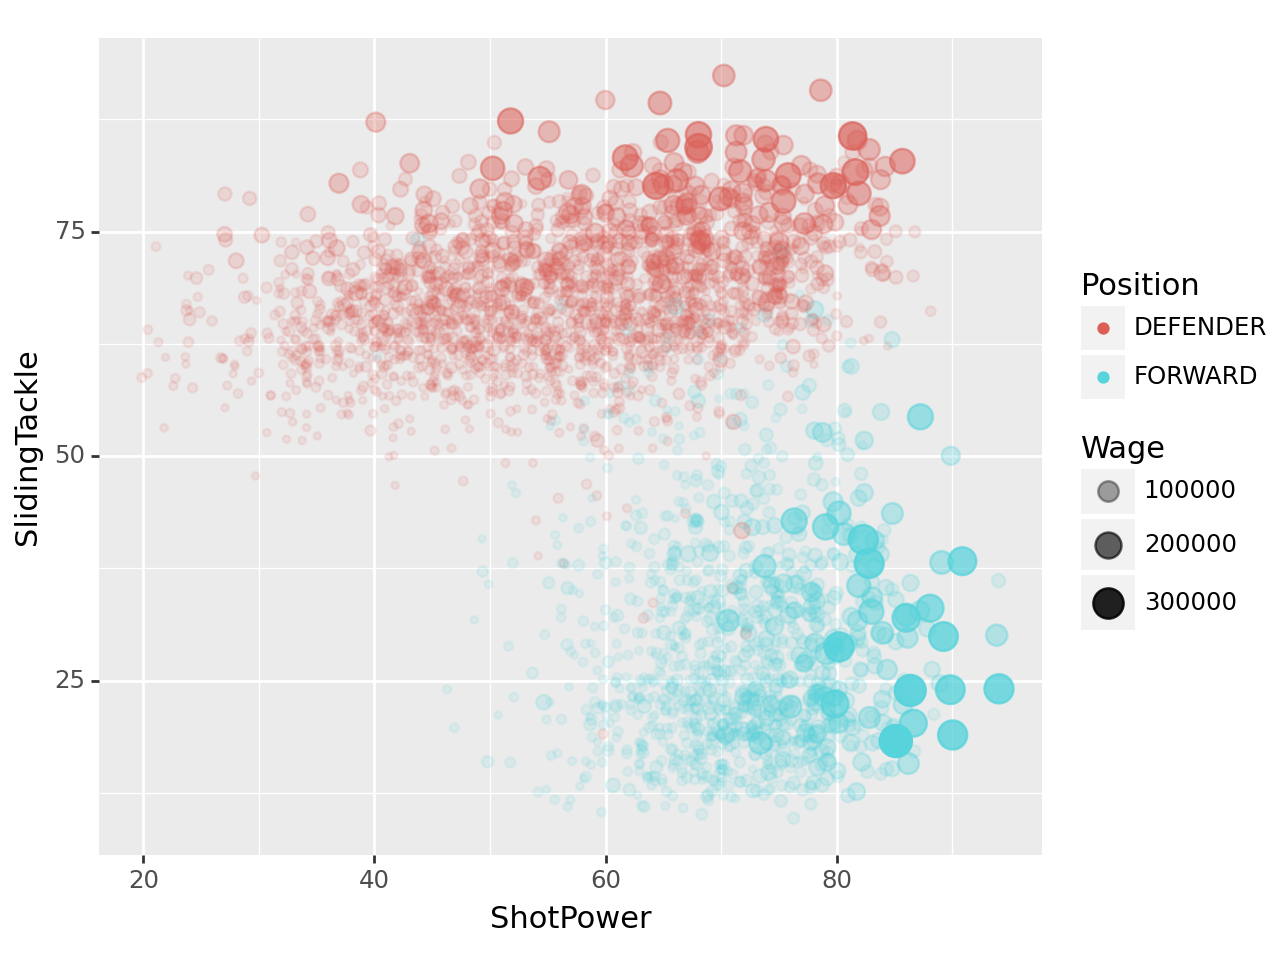

In [301]:
fig = ggplot(tidydata.query('Position=="DEFENDER" or Position=="FORWARD"'))
point = geom_point(aes(x='ShotPower',y='SlidingTackle',color='Position',size='Wage',alpha='Wage'),position='jitter')
fig+point